In [1]:
import numpy as np
import torch
# torch.set_default_device('cuda')
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from tqdm import tqdm
import time as tt

Quick check on how torch takes gradients. Just one code box. 

torch.Size([32, 32, 32])


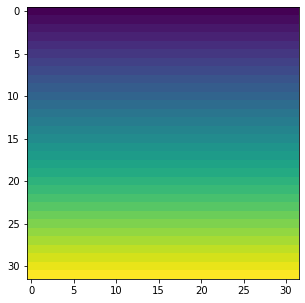

In [30]:
import matplotlib.pyplot as plt
import torch

def create_constant_gradient_tensor(grid_size, direction='x'):
    # Create a grid of points
    x = torch.linspace(0, 1, grid_size)
    
    # Depending on the direction, fill the 3D tensor
    if direction == 'x':
        # Repeat the x-values across the y and z dimensions to create a constant gradient along the x-direction
        tensor = x.view(grid_size, 1, 1).repeat(1, grid_size, grid_size)
    elif direction == 'y':
        # Repeat the y-values across the x and z dimensions to create a constant gradient along the y-direction
        tensor = x.view(1, grid_size, 1).repeat(grid_size, 1, grid_size)
    elif direction == 'z':
        # Repeat the z-values across the x and y dimensions to create a constant gradient along the z-direction
        tensor = x.view(1, 1, grid_size).repeat(grid_size, grid_size, 1)
    else:
        raise ValueError("Direction must be one of 'x', 'y', or 'z'")
    
    return tensor

# Set parameters
grid_size = 32  # Size of the grid
direction = 'x'  # Choose the direction of the gradient ('x', 'y', or 'z')

# Create the tensor with a constant gradient in the specified direction
tensor = create_constant_gradient_tensor(grid_size, direction)

# Output the tensor shape and the tensor
print(tensor.shape)

fig = plt.figure(figsize=(5,5))
a = fig.add_subplot(111)
p = a.imshow(tensor[:,:,10])

Spectra from concatenated and truncated MPS

In [2]:
E_k_original = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_original.tens')

E_k_conc_100 = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/concatenation/E_k_concatenation_100.tens')
E_k_conc_200 = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/concatenation/E_k_concatenation_200.tens')
E_k_conc_500 = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/concatenation/E_k_concatenation_500.tens')
E_k_conc_1000 = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/concatenation/E_k_concatenation_1000.tens')
E_k_conc_2000 = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/concatenation/E_k_concatenation_2000.tens')

# To compare, non concatenated MPS
E_k_sta_100_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_100.tens')
E_k_sta_200_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_200.tens')
E_k_sta_1000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_1000.tens')
E_k_sta_2000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_2000.tens')
E_k_seq_2000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_2000.tens')

/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_17115/3866372344.py:17: RuntimeWarning: divide by zero encountered in power
  power_law = 1.7*(x**(-5/3))


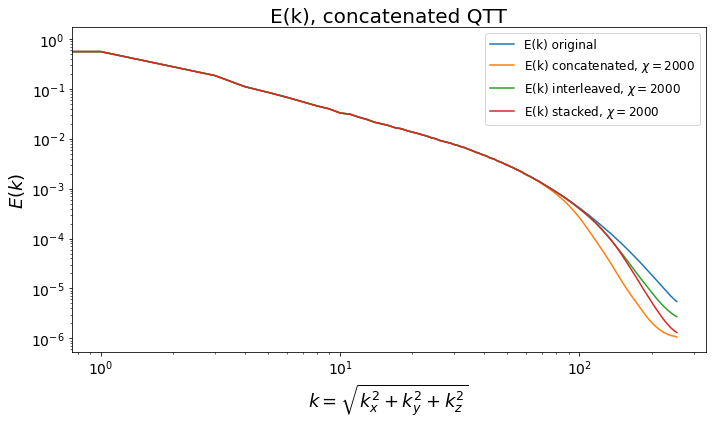

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(E_k_original, label=r'E(k) original')

# ax.plot(E_k_conc_2000, label='E_k_conc_1000')
# ax.plot(E_k_conc_200, label='E_k_conc_200')
# ax.plot(E_k_conc_500, label='E_k_conc_500')
# ax.plot(E_k_conc_1000, label='E_k_conc_1000')
ax.plot(E_k_conc_2000, label=r'E(k) concatenated, $\chi=2000$')

# ax.plot(E_k_sta_100_tens, label='E_k_sta_100')
ax.plot(E_k_seq_2000_tens, label=r'E(k) interleaved, $\chi=2000$')
ax.plot(E_k_sta_2000_tens, label=r'E(k) stacked, $\chi=2000$')

x = np.linspace(0,1024,1024)
power_law = 1.7*(x**(-5/3))

# ax.plot(power_law, label='power')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=12)  # Doubling font size for legend

# Doubling font size for labels and title
plt.xlabel(r'$k = \sqrt{k_x^2 + k_y^2 + k_z^2}$', fontsize=18)
plt.ylabel(r'$E(k)$', fontsize=18)
plt.title(r'E(k), concatenated QTT', fontsize=20)

# Adjust tick parameters for larger font size
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig("Plots/Concatenated_Ek_snap.pdf", format="pdf")
plt.show()

$E(k)$ as a function of $\chi$

In [2]:
E_k_original = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_original.tens')

E_k_sta_100_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_100.tens')
E_k_sta_200_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_200.tens')
E_k_sta_500_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_500.tens')
E_k_sta_1000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_1000.tens')
E_k_sta_2000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_2000.tens')
E_k_sta_5000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_5000.tens')
E_k_sta_10000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_10000.tens')

E_k_seq_100_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_100.tens')
E_k_seq_200_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_200.tens')
E_k_seq_500_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_500.tens')
E_k_seq_1000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_1000.tens')
E_k_seq_2000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_2000.tens')
E_k_seq_5000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_5000.tens')
E_k_seq_10000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_10000.tens')

/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_22456/2600287426.py:15: RuntimeWarning: divide by zero encountered in power
  power_law = 1.7*(x**(-5/3))


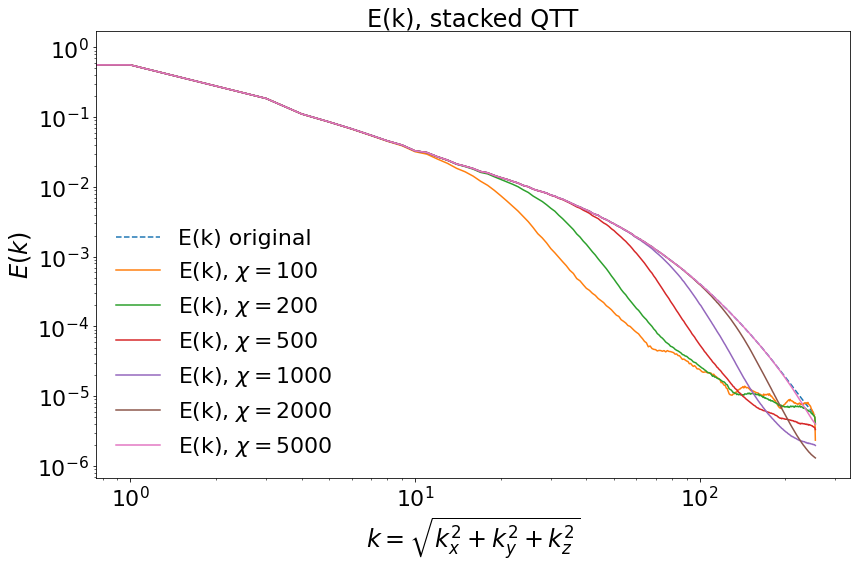

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(E_k_original, label=r'E(k) original', linestyle='--')

ax.plot(E_k_sta_100_tens, label=r'E(k), $\chi=100$')
ax.plot(E_k_sta_200_tens, label=r'E(k), $\chi=200$')
ax.plot(E_k_sta_500_tens, label=r'E(k), $\chi=500$')
ax.plot(E_k_sta_1000_tens, label=r'E(k), $\chi=1000$')
ax.plot(E_k_sta_2000_tens, label=r'E(k), $\chi=2000$')
ax.plot(E_k_sta_5000_tens, label=r'E(k), $\chi=5000$')
# ax.plot(E_k_sta_10000_tens, label=r'E(k), $\chi=10000$')

x = np.linspace(0,1024,1024)
power_law = 1.7*(x**(-5/3))

# ax.plot(power_law, label='power')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=22, loc='lower left', frameon=False)

# Doubling font size for labels and title
plt.xlabel(r'$k = \sqrt{k_x^2 + k_y^2 + k_z^2}$', fontsize=24)
plt.ylabel(r'$E(k)$', fontsize=24)
plt.title(r'E(k), stacked QTT', fontsize=24)

# Adjust tick parameters for larger font size
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig("Plots/Stacked_Ek_snap.pdf", format="pdf")
plt.show()

/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_22456/321419422.py:16: RuntimeWarning: divide by zero encountered in power
  power_law = 1.7*(x**(-5/3))


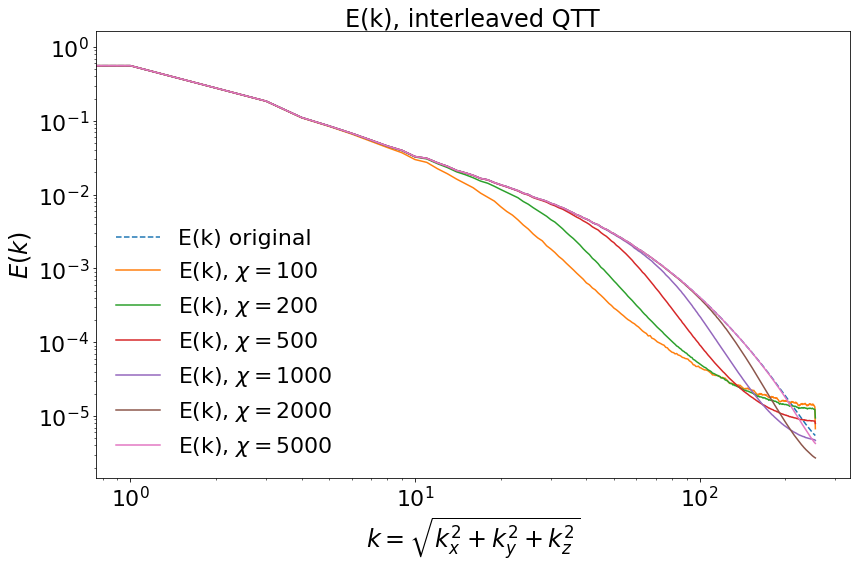

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot(E_k_original, label=r'E(k) original', linestyle='--')


ax.plot(E_k_seq_100_tens, label=r'E(k), $\chi=100$')
ax.plot(E_k_seq_200_tens, label=r'E(k), $\chi=200$')
ax.plot(E_k_seq_500_tens, label=r'E(k), $\chi=500$')
ax.plot(E_k_seq_1000_tens, label=r'E(k), $\chi=1000$')
ax.plot(E_k_seq_2000_tens, label=r'E(k), $\chi=2000$')
ax.plot(E_k_seq_5000_tens, label=r'E(k), $\chi=5000$')
# ax.plot(E_k_seq_10000_tens, label=r'E(k), $\chi=10000$')

x = np.linspace(0,1024,1024)
power_law = 1.7*(x**(-5/3))

# ax.plot(power_law, label='power')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=22, loc='lower left', frameon=False)

# Doubling font size for labels and title
plt.xlabel(r'$k = \sqrt{k_x^2 + k_y^2 + k_z^2}$', fontsize=24)
plt.ylabel(r'$E(k)$', fontsize=24)
plt.title(r'E(k), interleaved QTT', fontsize=24)

# Adjust tick parameters for larger font size
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig("Plots/Interleaved_Ek_snap.pdf", format="pdf")
plt.show()

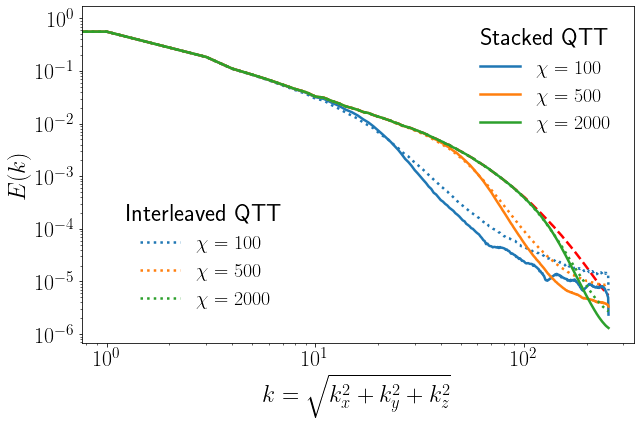

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ——— Global style setup ———
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "text.latex.preamble": r"\renewcommand{\familydefault}{\sfdefault}",
    "lines.linewidth": 2.5,           # thicker lines
    "axes.labelsize": 24,
    "axes.titlesize": 24,
    "legend.fontsize": 20,            # default legend font size (overridden below)
    "xtick.labelsize": 22,
    "ytick.labelsize": 22
})

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

# Plot original
ax.plot(
    E_k_original,
    label=r'E(k) original',
    linestyle='--',
    color='red'
)

# Prepare containers for legend handles and labels
stacked_handles, stacked_labels = [], []
interleaved_handles, interleaved_labels = [], []

# Define χ-values and colors
chis   = [100, 500, 2000]
colors = ['C0', 'C1', 'C2']

for chi, color in zip(chis, colors):
    # Stacked curve
    h_s, = ax.plot(
        globals()[f'E_k_sta_{chi}_tens'],
        label=rf'E(k) stacked, $\chi={chi}$',
        linestyle='-',
        color=color
    )
    stacked_handles.append(h_s)
    stacked_labels.append(rf'$\chi={chi}$')
    
    # Interleaved curve
    h_i, = ax.plot(
        globals()[f'E_k_seq_{chi}_tens'],
        label=rf'E(k) interleaved, $\chi={chi}$',
        linestyle=':',
        color=color
    )
    interleaved_handles.append(h_i)
    interleaved_labels.append(rf'$\chi={chi}$')

# Log–log scales
ax.set_xscale('log')
ax.set_yscale('log')

# First legend: Stacked, inset from top-right
leg1 = ax.legend(
    stacked_handles,
    stacked_labels,
    title='Stacked QTT',
    loc='upper right',
    bbox_to_anchor=(0.99, 0.99),   # 5% inward from the corner
    # fontsize=22,                   # legend entry font size
    title_fontsize=24,             # legend title font size
    frameon=False
)
ax.add_artist(leg1)

# Second legend: Interleaved, inset from bottom-left
ax.legend(
    interleaved_handles,
    interleaved_labels,
    title='Interleaved QTT',
    loc='lower left',
    bbox_to_anchor=(0.05, 0.05),   # 5% inward from the corner
    # fontsize=22,
    title_fontsize=24,
    frameon=False
)

# Axis labels
ax.set_xlabel(r'$k = \sqrt{k_x^2 + k_y^2 + k_z^2}$')
ax.set_ylabel(r'$E(k)$')

# Ticks
# ax.tick_params(axis='both', which='major', labelsize=22)
# ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig("Plots/Sta_VS_Inter_Ek_snap.pdf", format="pdf")
plt.show()



$d_{2}(u,u_{\chi}) = l_{2}(u-u_{\chi})$ , averaged over the three components of $\vec{u}=(u,v,w)$.

In [11]:
# Using dictionary
variables_dict = {}

for component in ['u']:
    for encoding in ['seq','sta']:
        for BD_MAX in [100, 200, 500, 1000, 5000, 10000]:
            
            var_name = f"l_2_{component}_{encoding}_{BD_MAX}"
            variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/d_2/{var_name}.tens')

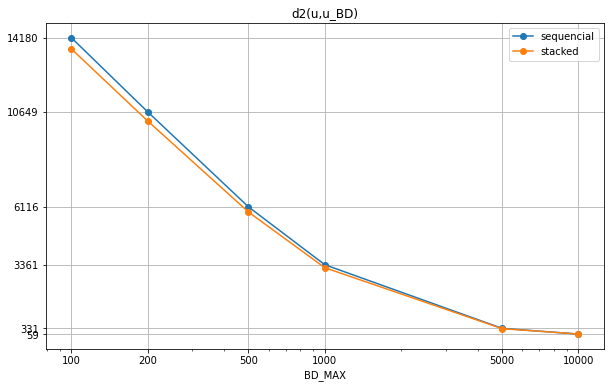

tensor(331.2219, dtype=torch.float64)


In [4]:
# Sort the BD_MAX values
bd_max_values = sorted([100, 200, 500, 1000, 5000, 10000])

# Initialize lists to hold the values for plotting
x_values = []
y_values = []

for bd_max in bd_max_values:
    var_name = f"l_2_u_seq_{bd_max}"
    if var_name in variables_dict:
        x_values.append(bd_max)
        y_values.append(int(variables_dict[var_name].item())) # Assuming tensor contains a single value, use .item() to get it

x1_values = []
y1_values = []

for bd_max in bd_max_values:
    var_name = f"l_2_u_sta_{bd_max}"
    if var_name in variables_dict:
        x1_values.append(bd_max)
        y1_values.append(int(variables_dict[var_name].item())) # Assuming tensor contains a single value, use .item() to get it

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', label='sequencial')
plt.plot(x1_values, y1_values, marker='o', linestyle='-', label='stacked')
plt.xlabel('BD_MAX')
plt.title('d2(u,u_BD)')
plt.xscale('log')
plt.legend()
plt.xticks(x_values, x_values)
plt.yticks(y_values, y_values)
plt.grid(True)
plt.show()

print(variables_dict['l_2_u_seq_5000'])

$d_{2}(\partial{u}, \partial{u}_{\chi})$, averaged over the three components of $\vec{\nabla} u=(\partial_{x}u, \partial_{y}u, \partial_{z}u)$.

In [5]:
# Using dictionary
variables_dict = {}

for component in ['u']:
    for encoding in ['seq','sta']:
        for BD_MAX in [100, 200, 500, 1000, 5000, 10000]:
            
            var_name = f"l_2_grad_{component}_{encoding}_{BD_MAX}"
            variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/d_2_grad/{var_name}.tens')

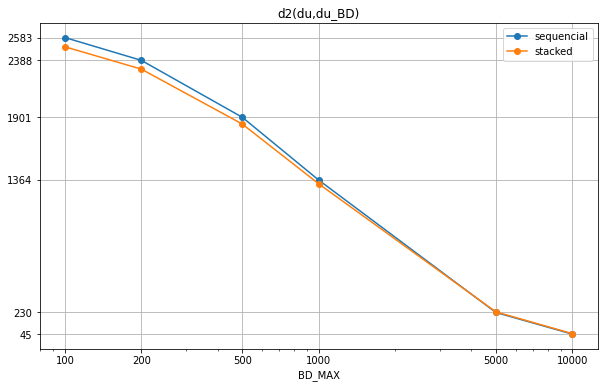

tensor(230.7906, dtype=torch.float64)


In [6]:
# Sort the BD_MAX values
bd_max_values = sorted([100, 200, 500, 1000, 5000, 10000])

# Initialize lists to hold the values for plotting
x_values = []
y_values = []

for bd_max in bd_max_values:
    var_name = f"l_2_grad_u_seq_{bd_max}"
    if var_name in variables_dict:
        x_values.append(bd_max)
        y_values.append(int(variables_dict[var_name].item())) # Assuming tensor contains a single value, use .item() to get it

x1_values = []
y1_values = []

for bd_max in bd_max_values:
    var_name = f"l_2_grad_u_sta_{bd_max}"
    if var_name in variables_dict:
        x1_values.append(bd_max)
        y1_values.append(int(variables_dict[var_name].item())) # Assuming tensor contains a single value, use .item() to get it

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', label='sequencial')
plt.plot(x1_values, y1_values, marker='o', linestyle='-', label='stacked')
plt.xlabel('BD_MAX')
plt.title('d2(du,du_BD)')
plt.xscale('log')
plt.legend()
plt.xticks(x_values, x_values)
plt.yticks(y_values, y_values)
plt.grid(True)
plt.show()

print(variables_dict['l_2_grad_u_seq_5000'])

$||\vec{\nabla} \cdot \vec{u}||_{2}$ and $||\vec{\nabla} \cdot \vec{u}||_{\infty}$

In [7]:
# Using dictionary
variables_dict = {}

for norm_type in ['2','inf']:
    for encoding in ['seq','sta']:
        for BD_MAX in [100, 200, 500, 1000, 5000, 10000]:
            
            var_name = f"div_l_{norm_type}_norm_{encoding}_{BD_MAX}"
            variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/div/{var_name}.tens')

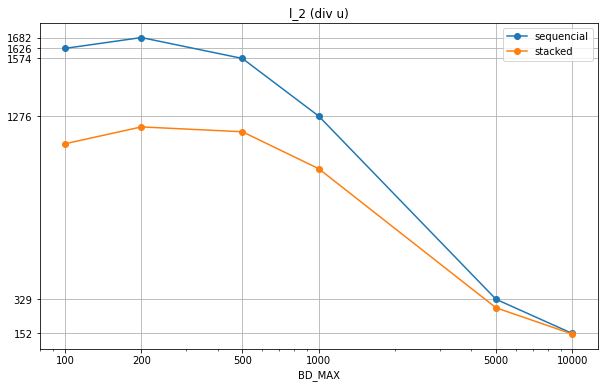

In [8]:
# Sort the BD_MAX values
bd_max_values = sorted([100, 200, 500, 1000, 5000, 10000])

# Initialize lists to hold the values for plotting
x_values = []
y_values = []

for bd_max in bd_max_values:
    var_name = f"div_l_2_norm_seq_{bd_max}"
    if var_name in variables_dict:
        x_values.append(bd_max)
        y_values.append(int(variables_dict[var_name].item())) # Assuming tensor contains a single value, use .item() to get it

x1_values = []
y1_values = []

for bd_max in bd_max_values:
    var_name = f"div_l_2_norm_sta_{bd_max}"
    if var_name in variables_dict:
        x1_values.append(bd_max)
        y1_values.append(int(variables_dict[var_name].item())) # Assuming tensor contains a single value, use .item() to get it

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', label='sequencial')
plt.plot(x1_values, y1_values, marker='o', linestyle='-', label='stacked')
plt.xlabel('BD_MAX')
plt.title('l_2 (div u)')
plt.xscale('log')
plt.legend()
plt.xticks(x_values, x_values)
plt.yticks(y_values, y_values)
plt.grid(True)
plt.show()

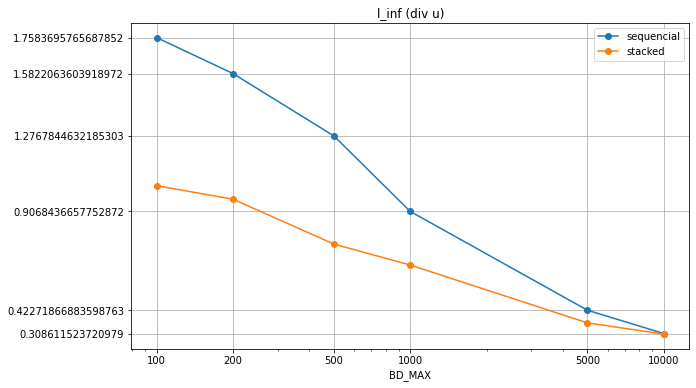

In [9]:
# Sort the BD_MAX values
bd_max_values = sorted([100, 200, 500, 1000, 5000, 10000])

# Initialize lists to hold the values for plotting
x_values = []
y_values = []

for bd_max in bd_max_values:
    var_name = f"div_l_inf_norm_seq_{bd_max}"
    if var_name in variables_dict:
        x_values.append(bd_max)
        y_values.append(variables_dict[var_name].item()) # Assuming tensor contains a single value, use .item() to get it

x1_values = []
y1_values = []

for bd_max in bd_max_values:
    var_name = f"div_l_inf_norm_sta_{bd_max}"
    if var_name in variables_dict:
        x1_values.append(bd_max)
        y1_values.append(variables_dict[var_name].item()) # Assuming tensor contains a single value, use .item() to get it

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', label='sequencial')
plt.plot(x1_values, y1_values, marker='o', linestyle='-', label='stacked')
plt.xlabel('BD_MAX')
plt.title('l_inf (div u)')
plt.xscale('log')
plt.legend()
plt.xticks(x_values, x_values)
plt.yticks(y_values, y_values)
plt.grid(True)
plt.show()

STATISTICS OVER MANY SAMPLES

$d_{2}(u,u_{\chi}) = l_{2}(u-u_{\chi})$ , averaged over the three components of $\vec{u}=(u,v,w)$.

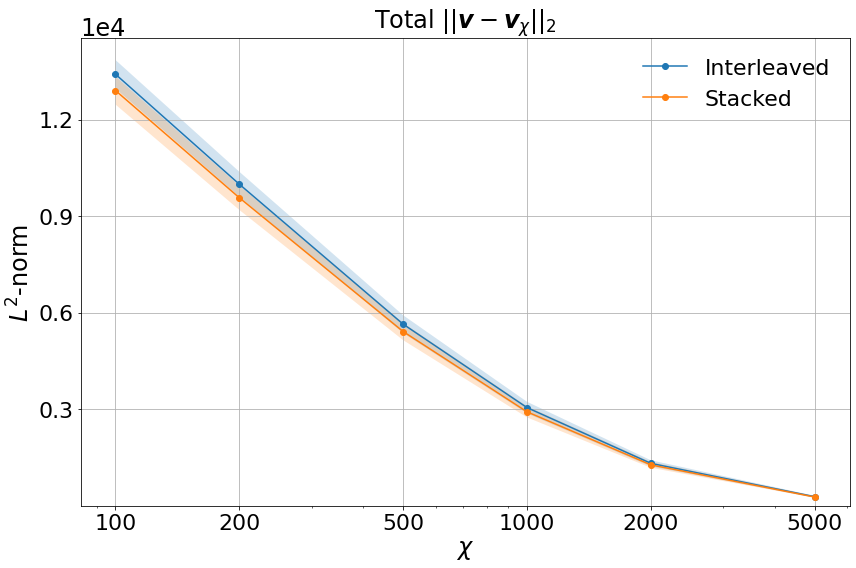

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Initialize a dictionary to store the variables
variables_dict = {}

# Define snapshots, components, encodings, and BD_MAX values
snapshots = [10286, 11712, 13147, 13198, 15107, 15181, 17710, 17787, 22402, 22490, 26429]

components = ['u']
encodings = ['seq', 'sta']
bd_max_values = [100, 200, 500, 1000, 2000, 5000]

# Load the data into the dictionary
for snap in snapshots:
    for component in components:
        for encoding in encodings:
            for bd_max in bd_max_values:
                var_name = f"l_2_{snap}_{component}_{encoding}_{bd_max}"
                variables_dict[var_name] = torch.load(
                    f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/statistic/{var_name}.tens'
                )

# Compute mean and variance for each BD_MAX & encoding
mean_dict = {enc: [] for enc in encodings}
var_dict  = {enc: [] for enc in encodings}
for encoding in encodings:
    for bd_max in bd_max_values:
        vals = [variables_dict[f"l_2_{snap}_u_{encoding}_{bd_max}"].item()
                for snap in snapshots
                if f"l_2_{snap}_u_{encoding}_{bd_max}" in variables_dict]
        mean_dict[encoding].append(np.mean(vals))
        var_dict[encoding].append(np.var(vals))

# Plot
plt.figure(figsize=(12, 8))
for encoding in encodings:
    mean_vals = np.array(mean_dict[encoding])
    std_dev   = np.sqrt(var_dict[encoding])
    label     = 'Interleaved' if encoding=='seq' else 'Stacked'

    plt.plot(bd_max_values, mean_vals, marker='o', linestyle='-', label=label)
    plt.fill_between(bd_max_values,
                     mean_vals - std_dev,
                     mean_vals + std_dev,
                     alpha=0.2)

plt.xlabel(r'$\chi$', fontsize=24)
plt.ylabel(r'$L^2$-norm', fontsize=24)
plt.title(r'Total $|| \boldsymbol{v} - \boldsymbol{v}_{\chi} ||_2$', fontsize=24)
plt.xscale('log')
plt.xticks(bd_max_values, bd_max_values)
plt.grid(True)

ax = plt.gca()
ax.set_ylim(bottom=0)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))

# New: scientific notation + larger offset text
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=22, frameon=False)

plt.tight_layout()
plt.savefig("Plots/Norm_difference_vel.pdf", format="pdf")
plt.show()



$d_{2}(\partial{u}, \partial{u}_{\chi})$, averaged over the three components of $\vec{\nabla} u=(\partial_{x}u, \partial_{y}u, \partial_{z}u)$.

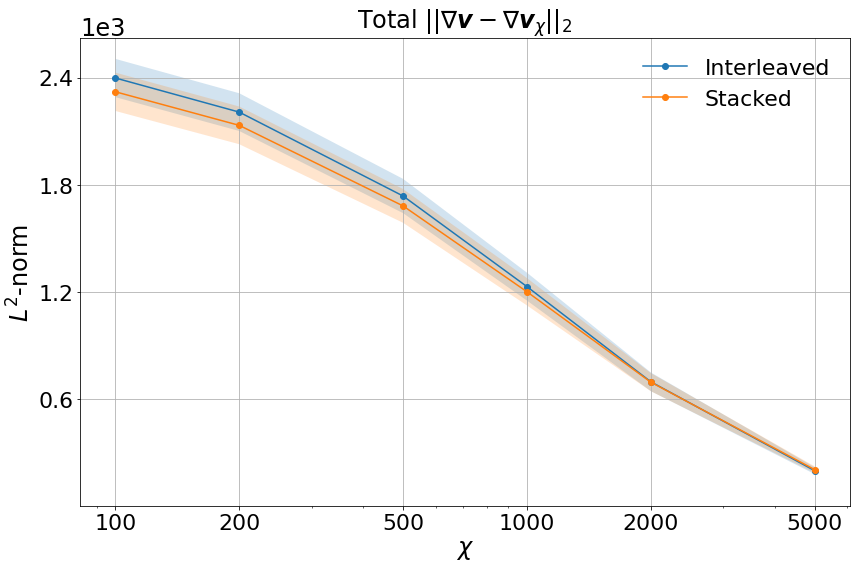

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to store the variables
variables_dict = {}

# Define snapshots, components, encodings, and BD_MAX values
snapshots = [10286, 11712, 13147, 13198, 15107, 15181, 17710, 17787, 22402, 22490, 26429]

components = ['u']
encodings = ['seq', 'sta']
bd_max_values = [100, 200, 500, 1000, 2000, 5000]

# Load the data into the dictionary
for snap in snapshots:
    for component in components:
        for encoding in encodings:
            for bd_max in bd_max_values:
                var_name = f"l_2_grad_{snap}_{component}_{encoding}_{bd_max}"
                variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/statistic/{var_name}.tens')

# Initialize dictionaries to hold the statistics
mean_dict = {encoding: [] for encoding in encodings}
var_dict = {encoding: [] for encoding in encodings}

# Compute mean and variance for each BD_MAX
for encoding in encodings:
    for bd_max in bd_max_values:
        values = []
        for snap in snapshots:
            var_name = f"l_2_grad_{snap}_u_{encoding}_{bd_max}"
            if var_name in variables_dict:
                values.append(variables_dict[var_name].item())  # Convert tensor to a scalar value
        
        # Compute mean and variance
        mean_value = np.mean(values)
        variance_value = np.var(values)
        
        mean_dict[encoding].append(mean_value)
        var_dict[encoding].append(variance_value)







# Plot the data with shaded variance area for each encoding
plt.figure(figsize=(12, 8))
for encoding in encodings:
    mean_values = mean_dict[encoding]
    var_values = var_dict[encoding]
    std_dev = np.sqrt(var_values)  # Standard deviation for error bars

    if encoding == 'sta':
        label = 'Stacked'
    elif encoding == 'seq':
        label = 'Interleaved'

    plt.plot(bd_max_values, mean_values, marker='o', linestyle='-', label=label)
    plt.fill_between(bd_max_values, np.array(mean_values) - std_dev, np.array(mean_values) + std_dev, alpha=0.2)

plt.xlabel(r'$\chi$', fontsize=24)
plt.ylabel('$L^2$-norm', fontsize=24)
plt.title(r'Total $|| \nabla \boldsymbol{v} - \nabla \boldsymbol{v}_{\chi} ||_2$', fontsize=24)
plt.xscale('log')
plt.xticks(bd_max_values, bd_max_values)
plt.grid(True)


ax = plt.gca()
ax.set_ylim(bottom=0)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))

# New: scientific notation + larger offset text
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=22, frameon=False)

plt.tight_layout()
plt.savefig("Plots/Norm_difference_grad.pdf", format="pdf")
plt.show()

$||\vec{\nabla} \cdot \vec{u}||_{2}$ and $||\vec{\nabla} \cdot \vec{u}||_{\infty}$

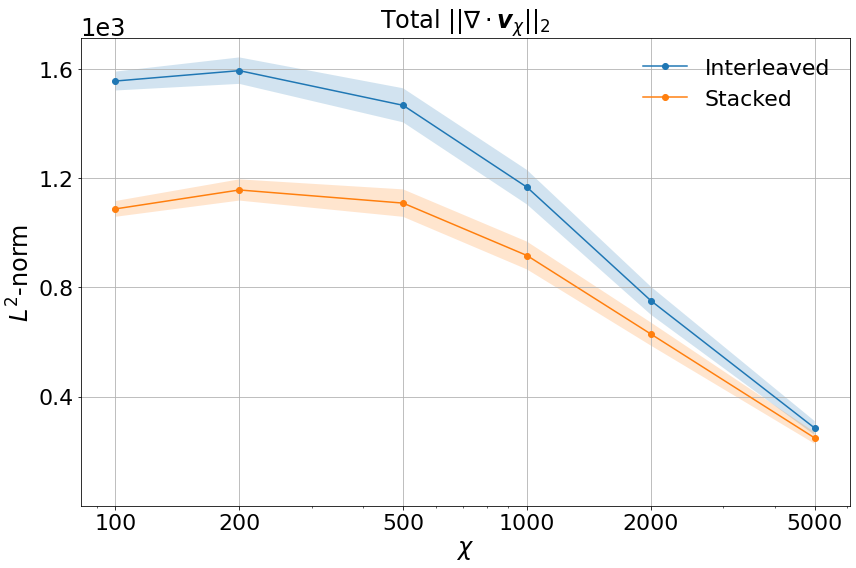

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to store the variables
variables_dict = {}

# Define snapshots, components, encodings, and BD_MAX values
snapshots = [10286, 11712, 13147, 13198, 15107, 15181, 17710, 17787, 22402, 22490, 26429]

components = ['u']
encodings = ['seq', 'sta']
bd_max_values = [100, 200, 500, 1000, 2000, 5000]

# Load the data into the dictionary
for snap in snapshots:
    for component in components:
        for encoding in encodings:
            for bd_max in bd_max_values:
                var_name = f"div_l_2_norm_{snap}_{encoding}_{bd_max}"
                variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/statistic/{var_name}.tens')

# Initialize dictionaries to hold the statistics
mean_dict = {encoding: [] for encoding in encodings}
var_dict = {encoding: [] for encoding in encodings}

# Compute mean and variance for each BD_MAX
for encoding in encodings:
    for bd_max in bd_max_values:
        values = []
        for snap in snapshots:
            var_name = f"div_l_2_norm_{snap}_{encoding}_{bd_max}"
            if var_name in variables_dict:
                values.append(variables_dict[var_name].item())  # Convert tensor to a scalar value
        
        # Compute mean and variance
        mean_value = np.mean(values)
        variance_value = np.var(values)
        
        mean_dict[encoding].append(mean_value)
        var_dict[encoding].append(variance_value)

# Plot the data with shaded variance area for each encoding
plt.figure(figsize=(12, 8))

for encoding in encodings:
    mean_values = mean_dict[encoding]
    var_values = var_dict[encoding]
    std_dev = np.sqrt(var_values)  # Standard deviation for error bars

    if encoding == 'sta':
        label = 'Stacked'
    elif encoding == 'seq':
        label = 'Interleaved'

    plt.plot(bd_max_values, mean_values, marker='o', linestyle='-', label=label)
    plt.fill_between(bd_max_values, np.array(mean_values) - std_dev, np.array(mean_values) + std_dev, alpha=0.2)

plt.xlabel(r'$\chi$', fontsize=24)
plt.ylabel(r'$L^2$-norm', fontsize=24)
plt.title(r'Total $|| \nabla \cdot \boldsymbol{v}_{\chi} ||_2$', fontsize=24)
plt.xscale('log')
plt.xticks(bd_max_values, bd_max_values)
plt.grid(True)

ax = plt.gca()
ax.set_ylim(bottom=0)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))

# New: scientific notation + larger offset text
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=22, frameon=False)

plt.tight_layout()
plt.savefig("Plots/Norm_2_divergence.pdf", format="pdf")
plt.show()

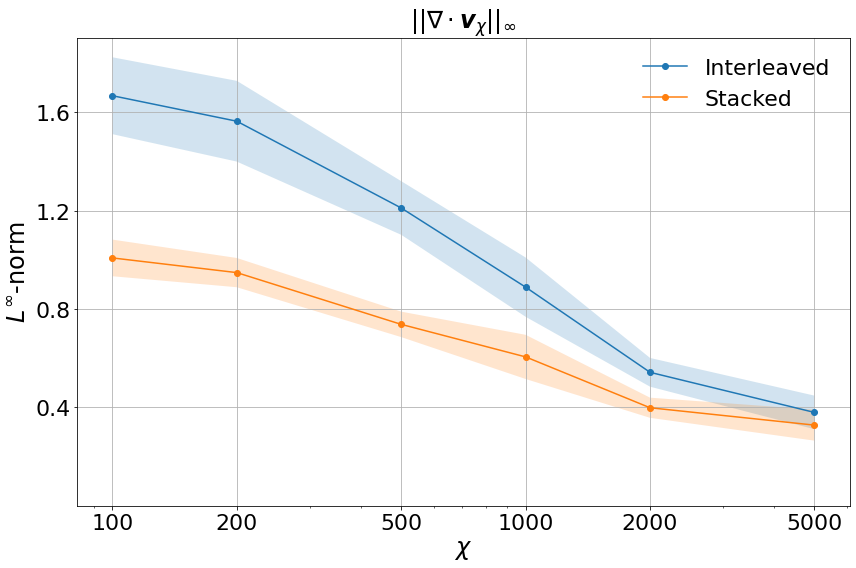

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to store the variables
variables_dict = {}

# Define snapshots, components, encodings, and BD_MAX values
snapshots = [10286, 11712, 13147, 13198, 15107, 15181, 17710, 17787, 22402, 22490, 26429]

components = ['u']
encodings = ['seq', 'sta']
bd_max_values = [100, 200, 500, 1000, 2000, 5000]

# Load the data into the dictionary
for snap in snapshots:
    for component in components:
        for encoding in encodings:
            for bd_max in bd_max_values:
                var_name = f"div_l_inf_norm_{snap}_{encoding}_{bd_max}"
                variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/statistic/{var_name}.tens')

# Initialize dictionaries to hold the statistics
mean_dict = {encoding: [] for encoding in encodings}
var_dict = {encoding: [] for encoding in encodings}

# Compute mean and variance for each BD_MAX
for encoding in encodings:
    for bd_max in bd_max_values:
        values = []
        for snap in snapshots:
            var_name = f"div_l_inf_norm_{snap}_{encoding}_{bd_max}"
            if var_name in variables_dict:
                values.append(variables_dict[var_name].item())  # Convert tensor to a scalar value
        
        # Compute mean and variance
        mean_value = np.mean(values)
        variance_value = np.var(values)
        
        mean_dict[encoding].append(mean_value)
        var_dict[encoding].append(variance_value)

# Plot the data with shaded variance area for each encoding
plt.figure(figsize=(12, 8))

for encoding in encodings:
    mean_values = mean_dict[encoding]
    var_values = var_dict[encoding]
    std_dev = np.sqrt(var_values)  # Standard deviation for error bars

    if encoding == 'sta':
        label = 'Stacked'
    elif encoding == 'seq':
        label = 'Interleaved'

    plt.plot(bd_max_values, mean_values, marker='o', linestyle='-', label=label)
    plt.fill_between(bd_max_values, np.array(mean_values) - std_dev, np.array(mean_values) + std_dev, alpha=0.2)

plt.xlabel(r'$\chi$', fontsize=24)
plt.ylabel(r'$L^{\infty}$-norm', fontsize=24)
plt.title(r'$|| \nabla \cdot \boldsymbol{v}_{\chi} ||_{\infty}$', fontsize=24)
plt.xscale('log')
plt.xticks(bd_max_values, bd_max_values)
plt.grid(True)

ax = plt.gca()
ax.set_ylim(bottom=0)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))

# New: scientific notation + larger offset text
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=22, frameon=False)

plt.tight_layout()
plt.savefig("Plots/Norm_inf_divergence.pdf", format="pdf")
plt.show()

Test unique plot for the two divergences and L_inf norm.

In [13]:
-----------------TODO INCLUDE LATEX----------------

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define snapshots, encodings, and BD_MAX values
snapshots     = [10286, 11712, 13147, 13198, 15107, 15181, 17710, 17787, 22402, 22490, 26429]
encodings     = ['seq', 'sta']
bd_max_values = [100, 200, 500, 1000, 2000, 5000]

def load_stats(prefix, include_component=True):
    """
    Load tensors named either
      {prefix}_{snap}_{component}_{encoding}_{bd}
    or
      {prefix}_{snap}_{encoding}_{bd}
    depending on include_component.
    Returns two dicts: mean_dict[encoding], var_dict[encoding].
    """
    vars_dict = {}
    for snap in snapshots:
        for enc in encodings:
            for bd in bd_max_values:
                if include_component:
                    # assumes component 'u'
                    name = f"{prefix}_{snap}_u_{enc}_{bd}"
                else:
                    name = f"{prefix}_{snap}_{enc}_{bd}"
                path = f"/Users/stefanopisoni/NoSync/10_qb_cluster_torch/statistic/{name}.tens"
                vars_dict[name] = torch.load(path)
    mean_d = {enc: [] for enc in encodings}
    var_d  = {enc: [] for enc in encodings}
    for enc in encodings:
        for bd in bd_max_values:
            name = f"{prefix}_{snapshots[0]}_{('u_' if include_component else '')}{enc}_{bd}"
            # collect across all snapshots
            vals = [
                vars_dict[f"{prefix}_{snap}_{'u_' if include_component else ''}{enc}_{bd}"].item()
                for snap in snapshots
                if f"{prefix}_{snap}_{'u_' if include_component else ''}{enc}_{bd}" in vars_dict
            ]
            mean_d[enc].append(np.mean(vals))
            var_d[enc].append(np.var(vals))
    return mean_d, var_d

# Load & compute statistics
mean_vel,  var_vel  = load_stats("l_2",           include_component=True)
mean_grad, var_grad = load_stats("l_2_grad",      include_component=True)
mean_div,  var_div  = load_stats("div_l_inf_norm", include_component=False)

# Create 1×3 figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

titles = [
    r'$||v - v_{\chi}||_2$',
    r'$||\nabla v - \nabla v_{\chi}||_2$',
    r'$||\nabla\cdot v_{\chi}||_{\infty}$'
]
stats = [
    (mean_vel, var_vel),
    (mean_grad, var_grad),
    (mean_div, var_div)
]

for ax, title, (mean_dict, var_dict) in zip(axes, titles, stats):
    for enc in encodings:
        mean_vals = np.array(mean_dict[enc])
        std_dev   = np.sqrt(var_dict[enc])
        label     = 'Stacked' if enc=='sta' else 'Interleaved'
        linestyle = '-' if enc=='sta' else ':'
        ax.plot(
            bd_max_values,
            mean_vals,
            marker='o',
            linestyle=linestyle,
            label=label
        )
        ax.fill_between(
            bd_max_values,
            mean_vals - std_dev,
            mean_vals + std_dev,
            alpha=0.2
        )
    ax.set_xscale('log')
    ax.set_xlabel(r'$\chi$', fontsize=20)
    ax.set_title(title, fontsize=20)
    ax.grid(True)

    # formatting tweaks
    ax.set_ylim(bottom=0)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.get_offset_text().set_fontsize(16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14, frameon=False)

# Common y-label only on the leftmost subplot
axes[0].set_ylabel('Value (scientific notation)', fontsize=20)

plt.tight_layout()
plt.savefig("Plots/combined_three_panels.pdf", format="pdf")
plt.show()



SyntaxError: invalid syntax (3440533513.py, line 1)